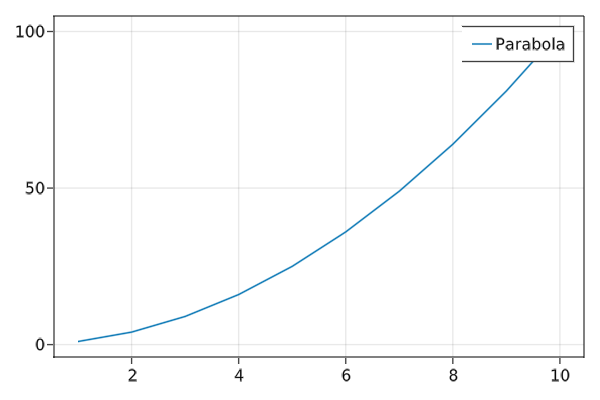

In [2]:
# Source
# https://makie.juliaplots.org/v0.15/examples/plotting_functions/surface/
using GLMakie

x = 1:10
fig = lines(x, x.^2; label = "Parabola")
axislegend()
save("./parabola.png", fig,  resolution = (600,400))
fig

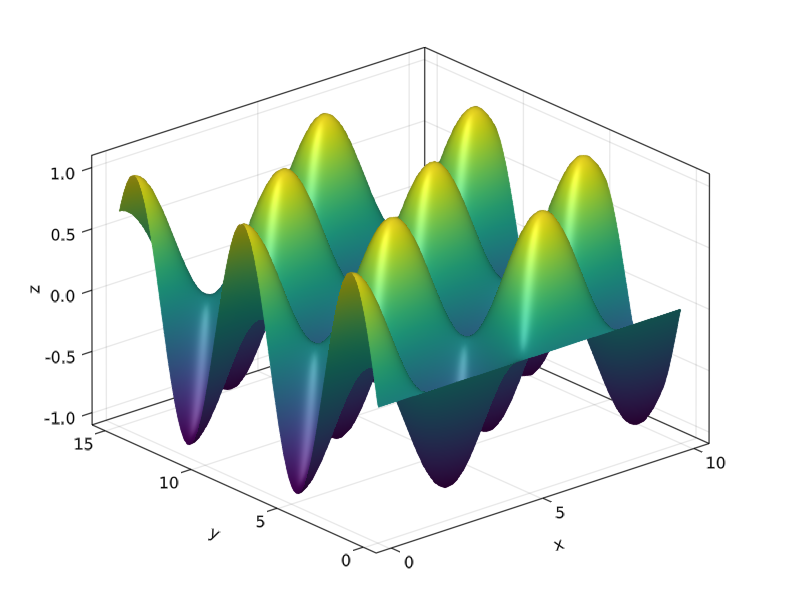

In [3]:
using GLMakie

xs = LinRange(0, 10, 100)
ys = LinRange(0, 15, 100)
zs = [cos(x) * sin(y) for x in xs, y in ys]

surface(xs, ys, zs, axis=(type=Axis3,))

In [6]:
# Works when we create an environment and use Julia REPL only
# mkdir projectGLMakie
# cd projectGLMakie
# julia --project="."
# ]
# pkg> add GLMakie
# julia> include("thisfile.jl")

using GLMakie
using Random: seed!
GLMakie.activate!()

function scatters_in_3D()
    seed!(123)
    xyz = randn(10, 3)
    x, y, z = xyz[:, 1], xyz[:, 2], xyz[:, 3]
    fig = Figure(resolution=(1200, 400))
    ax1 = Axis3(fig[1, 1]; aspect=(1, 1, 1), perspectiveness=0.5)
    ax2 = Axis3(fig[1, 2]; aspect=(1, 1, 1), perspectiveness=0.5)
    ax3 = Axis3(fig[1, 3]; aspect=:data, perspectiveness=0.5)
    scatter!(ax1, x, y, z; markersize=15)
    meshscatter!(ax2, x, y, z; markersize=0.25)
    hm = meshscatter!(ax3, x, y, z; markersize=0.25,
        marker=Rect3f(Vec3f(0), Vec3f(1)), color=1:size(xyz,2),
        colormap=:plasma, transparency=false)
    Colorbar(fig[1, 4], hm, label="values", height=Relative(0.5))
    fig
end
scatters_in_3D()

LoadError: UndefVarError: Vec3f not defined

In [7]:
using GLMakie

x = y = -5:0.5:5
z = x .^ 2 .+ y' .^ 2
set_theme!(colormap = :Hiroshige)
fig = Figure()
ax3d = Axis3(fig[1, 1]; aspect = (1, 1, 1),
    perspectiveness = 0.5, azimuth = 2.19, elevation = 0.57)
ax2d = Axis(fig[1, 2]; aspect = 1)
pltobj = surface!(ax3d, x, y, z; transparency = true)
heatmap!(ax2d, x, y, z; colormap = (:Hiroshige, 0.5))
contour!(ax2d, x, y, z; linewidth = 2, levels = 12, color = :black)
contour3d!(ax3d, x, y, z; linewidth = 4, levels = 12,
    transparency = true)
Colorbar(fig[1, 3], pltobj)
colsize!(fig.layout, 1, Aspect(1, 1.0))
colsize!(fig.layout, 2, Aspect(1, 1.0))
resize_to_layout!(fig)
save("./simpleLayout.png", fig)
fig

LoadError: UndefVarError: resize_to_layout! not defined

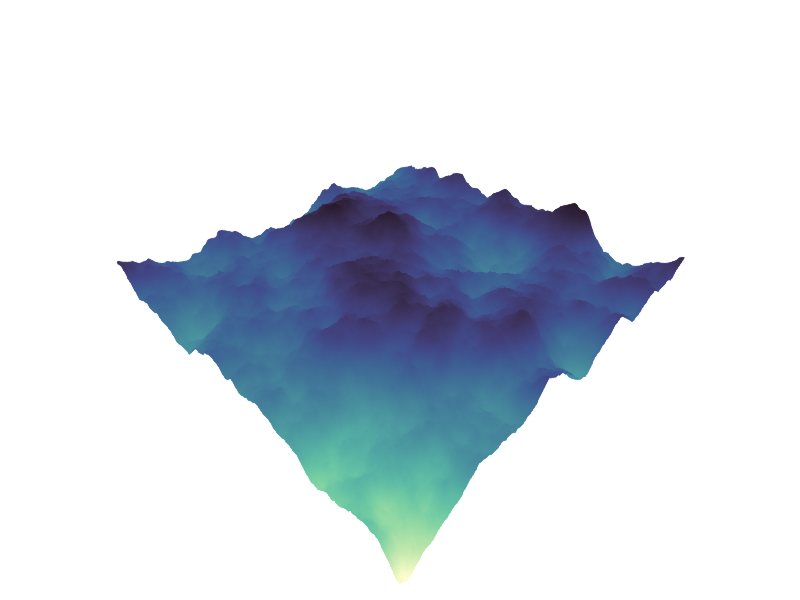

In [8]:
using SparseArrays
using LinearAlgebra
using GLMakie

# This example was provided by Moritz Schauer (@mschauer).

#=
Define the precision matrix (inverse covariance matrix)
for the Gaussian noise matrix.  It approximately coincides
with the Laplacian of the 2d grid or the graph representing
the neighborhood relation of pixels in the picture,
https://en.wikipedia.org/wiki/Laplacian_matrix
=#
function gridlaplacian(m, n)
    S = sparse(0.0I, n*m, n*m)
    linear = LinearIndices((1:m, 1:n))
    for i in 1:m
        for j in 1:n
            for (i2, j2) in ((i + 1, j), (i, j + 1))
                if i2 <= m && j2 <= n
                    S[linear[i, j], linear[i2, j2]] -= 1
                    S[linear[i2, j2], linear[i, j]] -= 1
                    S[linear[i, j], linear[i, j]] += 1
                    S[linear[i2, j2], linear[i2, j2]] += 1
                end
            end
        end
    end
    return S
end

# d is used to denote the size of the data
d = 150

 # Sample centered Gaussian noise with the right correlation by the method
 # based on the Cholesky decomposition of the precision matrix
data = 0.1randn(d,d) + reshape(
        cholesky(gridlaplacian(d,d) + 0.003I) \ randn(d*d),
        d, d
)

surface(data; shading=false, colormap = :deep, axis = (show_axis = false,))

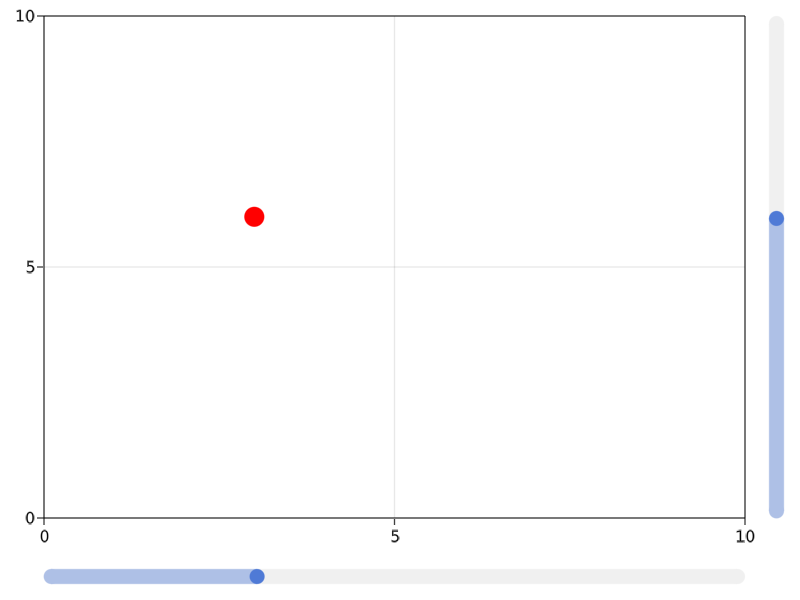

In [4]:
using GLMakie
fig = Figure()

ax = Axis(fig[1, 1])

sl_x = Slider(fig[2, 1], range = 0:0.01:10, startvalue = 3)
sl_y = Slider(fig[1, 2], range = 0:0.01:10, horizontal = false, startvalue = 6)

point = lift(sl_x.value, sl_y.value) do x, y
    Point2f0(x, y)
end

scatter!(point, color = :red, markersize = 20)

limits!(ax, 0, 10, 0, 10)

fig